In [19]:
import pandas as pd
import numpy as np
from sklearn import datasets
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)

import seaborn as sns; sns.set()

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict

In [2]:
df=pd.read_csv('Laundry_Data.csv')

# Data Cleaning


In [25]:
#df.info()
df.shape

(807, 22)

In [38]:
def fill_null_val(df):
    return df.fillna('Unknown')

def change_to_date(df):
    date=pd.to_datetime(df['Date'], infer_datetime_format=True)
    return df.assign(Date=date)

def change_to_time(df):
    time=pd.to_datetime(df['Time'], infer_datetime_format=True)
    time=pd.DatetimeIndex(time).time
    return df.assign(Time=time)

def get_day_col(df):
    dayCol=pd.DatetimeIndex(df['Date']).day
    return df.assign(Day=dayCol)

def get_month_col(df):
    monthCol=pd.DatetimeIndex(df['Date']).month
    return df.assign(Month=monthCol)

def fill_age(df):
    age=df['Age_Range'].fillna(round(df['Age_Range'].mean()))
    age=age.astype('int64') 
    return df.assign(Age_Range=age)

def fill_withKids_yes(df):
    with_kids = np.where(df["Kids_Category"]=='no_kids',df['With_Kids'],'yes')
    return df.assign(With_Kids=with_kids)

def drop_no(df):
    return df.drop('No',axis=1)

def fill_withKids_no(df):
    with_kids = np.where(df["Kids_Category"]!='no_kids',df['With_Kids'],'no')
    return df.assign(With_Kids=with_kids)

def W6_big(df):
    washer = np.where(df["Washer_No"]!=6,df['Basket_Size'],'big')
    return df.assign(Basket_Size=washer)

def bin_age(df):
    age_group= pd.cut(x=df['Age_Range'], bins=[20, 30, 40, 50,60])
    return df.assign(Age_Group=age_group)




def mark_washer(df):
    washer = df['Washer_No'].apply(lambda x: "{}{}".format('W_', x))
    return df.assign(Washer_No=washer)

def mark_dryer(df):
    dryer = df['Dryer_No'].apply(lambda x: "{}{}".format('D_', x))
    return df.assign(Dryer_No=dryer)

def mark_shirt(df):
    shirt = df['shirt_type'].apply(lambda x: "{}{}".format('S_', x))
    return df.assign(shirt_type=shirt)

def mark_pants(df):
    pants = df['pants_type'].apply(lambda x: "{}{}".format('P_', x))
    return df.assign(pants_type=pants)

arm_drop=['Date','Time','Age_Range','Race','Gender','Body_Size','With_Kids','Kids_Category','Spectacles']

arm_select1=['Basket_Size','Basket_colour','Washer_No','Dryer_No','Wash_Item']
arm_select2=['Gender','Body_Size','Age_Group','Attire','Kids_Category','Spectacles']


cluster_select=['Race','Gender','Body_Size','Age_Range','With_Kids','Kids_Category','Basket_Size']

def drop_arm(df):
    return df.drop(columns=arm_drop)

def select_arm1(df):
    return df[arm_select1]

def select_arm2(df):
    return df[arm_select2]





def select_cluster(df):
    return df[cluster_select]

In [44]:
df.head()

,No,Date,Time,Race,Gender,Body_Size,Age_Range,With_Kids,Kids_Category,Basket_Size,...,Shirt_Colour,shirt_type,Pants_Colour,pants_type,Wash_Item,Washer_No,Dryer_No,Spectacles,Day,Month
0,1,2015-10-19,20:17:50,malay,Unknown,moderate,42.0,yes,young,big,...,blue,short_sleeve,black,short,clothes,3,10,no,19,10
1,2,2015-10-19,20:28:42,indian,male,thin,32.0,no,no_kids,big,...,Unknown,short_sleeve,blue_jeans,long,Unknown,6,9,no,19,10
2,3,2015-10-19,20:58:31,malay,female,Unknown,30.0,no,no_kids,big,...,red,short_sleeve,black,long,Unknown,4,10,no,19,10
3,4,2015-10-19,21:31:28,indian,male,thin,51.0,no,no_kids,Unknown,...,Unknown,short_sleeve,yellow,short,clothes,5,9,no,19,10
4,5,2015-10-19,21:40:28,indian,male,moderate,34.0,no,no_kids,big,...,blue,short_sleeve,white,long,clothes,3,9,no,19,10


In [6]:
df=(df.pipe(change_to_dateTime)
                .pipe(get_day_col)
                .pipe(get_month_col)
                .pipe(fill_age)
                .pipe(fill_withKids_yes)
                .pipe(fill_withKids_no)
                .pipe(fill_null_val)
             )

In [7]:
len(df[df.isnull().any(axis=1)])/len(df)*100


0.0

In [8]:
df.isnull().sum()

No               0
Date             0
Time             0
Race             0
Gender           0
Body_Size        0
Age_Range        0
With_Kids        0
Kids_Category    0
Basket_Size      0
Basket_colour    0
Attire           0
Shirt_Colour     0
shirt_type       0
Pants_Colour     0
pants_type       0
Wash_Item        0
Washer_No        0
Dryer_No         0
Spectacles       0
Day              0
Month            0
dtype: int64

In [9]:
print('Race\n',df['Race'].value_counts())
print('Gender\n',df['Gender'].value_counts())
print('Body_Size\n',df['Body_Size'].value_counts())
print('With_Kids\n',df['With_Kids'].value_counts())
print('Kids_Category\n',df['Kids_Category'].value_counts())



Race
 indian        227
malay         222
chinese       221
foreigner      82
Unknown        55
Name: Race, dtype: int64
Gender
 female     361
male       355
Unknown     91
Name: Gender, dtype: int64
Body_Size
 fat         247
moderate    237
thin        225
Unknown      98
Name: Body_Size, dtype: int64
With_Kids
 no     603
yes    204
Name: With_Kids, dtype: int64
Kids_Category
 no_kids     603
young        90
toddler      47
baby         36
Unknown      30
toddler       1
Name: Kids_Category, dtype: int64


In [10]:
df.describe()

,No,Age_Range,Washer_No,Dryer_No,Day,Month
count,807.000000,807.000000,807.000000,807.000000,807.00000,807.000000
mean,404.000000,42.040892,4.465923,8.418835,21.80917,10.745973
std,233.105126,7.758262,1.152628,1.142694,8.49351,0.481577
min,1.000000,28.000000,3.000000,7.000000,1.00000,10.000000
25%,202.500000,36.000000,3.000000,7.000000,20.00000,10.000000
50%,404.000000,42.000000,4.000000,8.000000,24.00000,11.000000
75%,605.500000,49.000000,6.000000,9.000000,28.00000,11.000000
max,807.000000,55.000000,6.000000,10.000000,30.00000,12.000000


In [12]:
df_oneHot = pd.get_dummies(df, prefix='BC', columns=['Basket_colour'])
df_oneHot1 = pd.get_dummies(df_oneHot, prefix='Gen', columns=['Gender'])
df_oneHot2 = pd.get_dummies(df_oneHot1, prefix='Att', columns=['Attire'])
df_oneHot3 = pd.get_dummies(df_oneHot2, prefix='Wash', columns=['Washer_No'])
df_oneHot4 = pd.get_dummies(df_oneHot3, prefix='Dry', columns=['Dryer_No'])

#df_oneHot
df_oneHot4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 807 entries, 0 to 806
Data columns (total 44 columns):
No                 807 non-null int64
Date               807 non-null datetime64[ns]
Time               807 non-null object
Race               807 non-null object
Body_Size          807 non-null object
Age_Range          807 non-null float64
With_Kids          807 non-null object
Kids_Category      807 non-null object
Basket_Size        807 non-null object
Shirt_Colour       807 non-null object
shirt_type         807 non-null object
Pants_Colour       807 non-null object
pants_type         807 non-null object
Wash_Item          807 non-null object
Spectacles         807 non-null object
Day                807 non-null int64
Month              807 non-null int64
BC_Unknown         807 non-null uint8
BC_black           807 non-null uint8
BC_blue            807 non-null uint8
BC_brown           807 non-null uint8
BC_green           807 non-null uint8
BC_grey            807 non-null uint

In [13]:
df1=df_oneHot4.drop(['No'], axis = 1) 

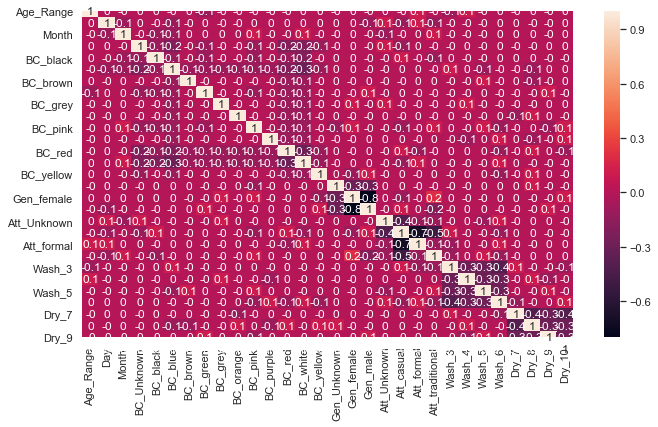

In [14]:
sns.set(rc={'figure.figsize':(11,6)})
#correlation matrix
correlation_matrix = df1.iloc[:,:].corr().round(1)

sns.heatmap(data=correlation_matrix, annot=True)


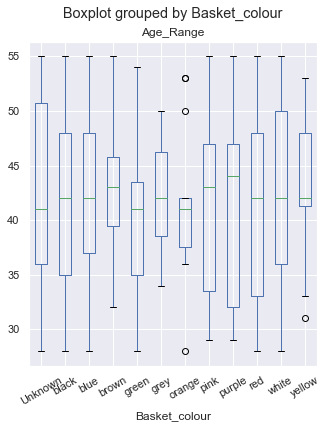

In [15]:
df.boxplot('Age_Range','Basket_colour',rot = 30,figsize=(5,6))

In [43]:
df.head(20)

,No,Date,Time,Race,Gender,Body_Size,Age_Range,With_Kids,Kids_Category,Basket_Size,...,Shirt_Colour,shirt_type,Pants_Colour,pants_type,Wash_Item,Washer_No,Dryer_No,Spectacles,Day,Month
0,1,2015-10-19,20:17:50,malay,Unknown,moderate,42.0,yes,young,big,...,blue,short_sleeve,black,short,clothes,3,10,no,19,10
1,2,2015-10-19,20:28:42,indian,male,thin,32.0,no,no_kids,big,...,Unknown,short_sleeve,blue_jeans,long,Unknown,6,9,no,19,10
2,3,2015-10-19,20:58:31,malay,female,Unknown,30.0,no,no_kids,big,...,red,short_sleeve,black,long,Unknown,4,10,no,19,10
3,4,2015-10-19,21:31:28,indian,male,thin,51.0,no,no_kids,Unknown,...,Unknown,short_sleeve,yellow,short,clothes,5,9,no,19,10
4,5,2015-10-19,21:40:28,indian,male,moderate,34.0,no,no_kids,big,...,blue,short_sleeve,white,long,clothes,3,9,no,19,10
5,6,2015-10-19,23:45:38,Unknown,male,fat,50.0,no,no_kids,small,...,brown,Unknown,blue_jeans,long,clothes,4,8,no,19,10
6,7,2015-10-19,23:53:38,Unknown,female,fat,45.0,no,no_kids,big,...,blue,Unknown,black,long,clothes,5,10,no,19,10
7,8,2015-10-20,0:24:01,indian,male,thin,49.0,yes,Unknown,big,...,Unknown,short_sleeve,brown,long,clothes,3,9,no,20,10
8,9,2015-10-20,0:45:19,indian,male,thin,30.0,no,no_kids,small,...,white,short_sleeve,black,short,clothes,6,10,no,20,10
9,10,2015-10-20,1:17:50,chinese,male,moderate,33.0,no,no_kids,small,...,white,short_sleeve,blue_jeans,short,Unknown,5,7,no,20,10


In [20]:
from sklearn.preprocessing import LabelEncoder

dfle = df.copy()
dfle['Washer_No'] = LabelEncoder().fit_transform(df.Washer_No)
#dfle1 = dfle.copy()
#dfle1['le_Basket_Size'] = LabelEncoder().fit_transform(dfle.Basket_Size)

dfle.head(20)

,No,Date,Time,Race,Gender,Body_Size,Age_Range,With_Kids,Kids_Category,Basket_Size,...,shirt_type,Pants_Colour,pants_type,Wash_Item,Washer_No,Dryer_No,Spectacles,Day,Month,le_Washer_No
0,1,2015-10-19,20:17:50,malay,Unknown,moderate,42.0,yes,young,big,...,short_sleeve,black,short,clothes,3,10,no,19,10,0
1,2,2015-10-19,20:28:42,indian,male,thin,32.0,no,no_kids,big,...,short_sleeve,blue_jeans,long,Unknown,6,9,no,19,10,3
2,3,2015-10-19,20:58:31,malay,female,Unknown,30.0,no,no_kids,big,...,short_sleeve,black,long,Unknown,4,10,no,19,10,1
3,4,2015-10-19,21:31:28,indian,male,thin,51.0,no,no_kids,Unknown,...,short_sleeve,yellow,short,clothes,5,9,no,19,10,2
4,5,2015-10-19,21:40:28,indian,male,moderate,34.0,no,no_kids,big,...,short_sleeve,white,long,clothes,3,9,no,19,10,0
5,6,2015-10-19,23:45:38,Unknown,male,fat,50.0,no,no_kids,small,...,Unknown,blue_jeans,long,clothes,4,8,no,19,10,1
6,7,2015-10-19,23:53:38,Unknown,female,fat,45.0,no,no_kids,big,...,Unknown,black,long,clothes,5,10,no,19,10,2
7,8,2015-10-20,0:24:01,indian,male,thin,49.0,yes,Unknown,big,...,short_sleeve,brown,long,clothes,3,9,no,20,10,0
8,9,2015-10-20,0:45:19,indian,male,thin,30.0,no,no_kids,small,...,short_sleeve,black,short,clothes,6,10,no,20,10,3
9,10,2015-10-20,1:17:50,chinese,male,moderate,33.0,no,no_kids,small,...,short_sleeve,blue_jeans,short,Unknown,5,7,no,20,10,2


In [39]:
X = df.drop('Washer_No', axis=1)
y = df['Washer_No']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=10)

In [41]:
# your codes here...
# Provide model accuracy, confusion matrix, <TN,TP,FP,FN>, Precision, Recall, F1, Accuracy
# your codes here...
# Provide model accuracy, confusion matrix, <TN,TP,FP,FN>, Precision, Recall, F1, Accuracy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

nb = GaussianNB()
nb.fit(X_train,y_train)
y_pred = nb.predict(X_test)
nb.score(X_test, y_test)
confusion_majority=confusion_matrix(y_test, y_pred)


print("Accuracy on test set: {:.3f}".format(nb.score(X_test, y_test)))
# Calculate AUC
prob_DT = nb.predict_proba(X_test)
prob_DT = prob_DT[:,1]
auc_DT = roc_auc_score(y_test,prob_DT)
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, prob_DT)
print("AUC: %.2f" % auc_DT)

print('Mjority classifier Confusion Matrix\n', confusion_majority)

print('***********')
print('Mjority TN= ', confusion_majority[0][0])
print('Mjority FP=', confusion_majority[0][1])
print('Mjority FN= ', confusion_majority[1][0])
print('Mjority TP= ', confusion_majority[1][1])
print('***********')

print('Precision= {:.2f}'.format(precision_score(y_test, y_pred)))
print('Recall= {:.2f}'. format(recall_score(y_test, y_pred)))
print('F1= {:.2f}'. format(f1_score(y_test, y_pred)))
print('Accuracy= {:.2f}'. format(accuracy_score(y_test, y_pred)))

TypeError: invalid type promotion